In [127]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.cm as cm

from matplotlib.cm import get_cmap
from create_in import create_in
from out_reader import out_reader

График поры

И графики такие же но если chi = 0.5


In [128]:
N_first_try = 100
N = 800

S_namics = 50

alpha = 0.4

Cs = pow(10, -2) * 1.66


chi_range = [2.5]

# [2.1, 2.2, 2.3, 2.4, 2.5, 2.6]

chi_ions = 0.5

plus_i = 0.1

In [129]:
phi_brush_prof, psi_brush_prof, ends_brush_prof, Na_prof, Cl_prof = {}, {}, {}, {}, {}
for chi in chi_range:
    new_file_path = create_in(
    range_param = 'chi',
    min_val = 0.1,
    max_val = 0.1,
    Cs = Cs,
    chi_first_try = 0.5,
    chi_ions_first_try = 0.5,
    chi_surf_first_try = 0.5,
    N_layers_first_try = N_first_try,
    N_first_try = N_first_try,

    S = S_namics,
    alpha = alpha,
    Kuhn = '1e-09',
    initial_cond = True,
    
    N_layers = int(N * 5/16),
    N = N,
    chi = chi,
    chi_ions = chi_ions,
    chi_surf = chi,)

    # Парсим профили
    psi, phi_brush, phi_end_brush, phi_Na, phi_Cl = out_reader(alpha = alpha,file_names=new_file_path)
    phi_brush_prof[chi] = (phi_brush)
    psi_brush_prof[chi] = (psi)
    ends_brush_prof[chi] = (phi_end_brush)
    Na_prof[chi] = (phi_Na)
    Cl_prof[chi] = (phi_Cl)

No output defined! 
No output defined! 
Problem nr 1 out of 2
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.119224e+00 |g| = 1.908890e+00 alpha = 1.000000e+00 
hessian scaling: 0.314391
it =  1  E = 1.043345e+00 |g| = 1.824716e+00 alpha = 1.523865e-01 
it =  2  E = 2.606502e+00 |g| = 1.888702e+00 alpha = 2.372927e-02 
it =  3  E = 3.383452e+00 |g| = 1.796648e+00 alpha = 1.247356e-02 
it =  4  E = 3.184760e+00 |g| = 1.814861e+00 alpha = 1.328808e-02 
it =  5  E = 2.715931e+00 |g| = 1.750889e+00 alpha = 1.663565e-02 
it =  6  E = 2.558383e+00 |g| = 1.726455e+00 alpha = 1.734379e-02 
it =  7  E = 2.548231e+00 |g| = 1.690808e+00 alpha = 1.608749e-02 
it =  8  E = 2.258305e+00 |g| = 1.659296e+00 alpha = 1.895796e-02 
it =  9  E = 2.137779e+00 |g| = 1.630886e+00 alpha = 1.968694e-02 
it =

it =  26  E = 1.238770e+00 |g| = 9.204805e+00 alpha = 1.108686e-01 
it =  27  E = 3.348677e+02 |g| = 9.205992e+00 alpha = 1.519703e-06 
it =  28  E = 3.036707e+02 |g| = 9.203629e+00 alpha = 1.849638e-06 
it =  29  E = 2.077436e+02 |g| = 9.199866e+00 alpha = 3.953930e-06 
it =  30  E = 1.040901e+02 |g| = 9.198039e+00 alpha = 1.576012e-05 
it =  31  E = 4.904201e+01 |g| = 9.201772e+00 alpha = 7.117245e-05 
it =  32  E = 5.840995e+01 |g| = 9.182375e+00 alpha = 5.014624e-05 
it =  33  E = 1.143423e+02 |g| = 9.137949e+00 alpha = 1.303948e-05 
it =  34  E = 1.376264e+02 |g| = 9.090813e+00 alpha = 8.962889e-06 
it =  35  E = 1.013386e+02 |g| = 9.063911e+00 alpha = 1.649361e-05 
it =  36  E = 5.824600e+01 |g| = 9.068126e+00 alpha = 4.998015e-05 
it =  37  E = 5.307323e+01 |g| = 9.059004e+00 alpha = 6.016750e-05 
it =  38  E = 6.562797e+01 |g| = 9.057049e+00 alpha = 3.934922e-05 
it =  39  E = 1.311612e+02 |g| = 9.015824e+00 alpha = 9.806532e-06 
it =  40  E = 8.890889e+01 |g| = 8.980878e+00 al

# График для плотности полимера

/tmp/ipykernel_2811776/2023903523.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


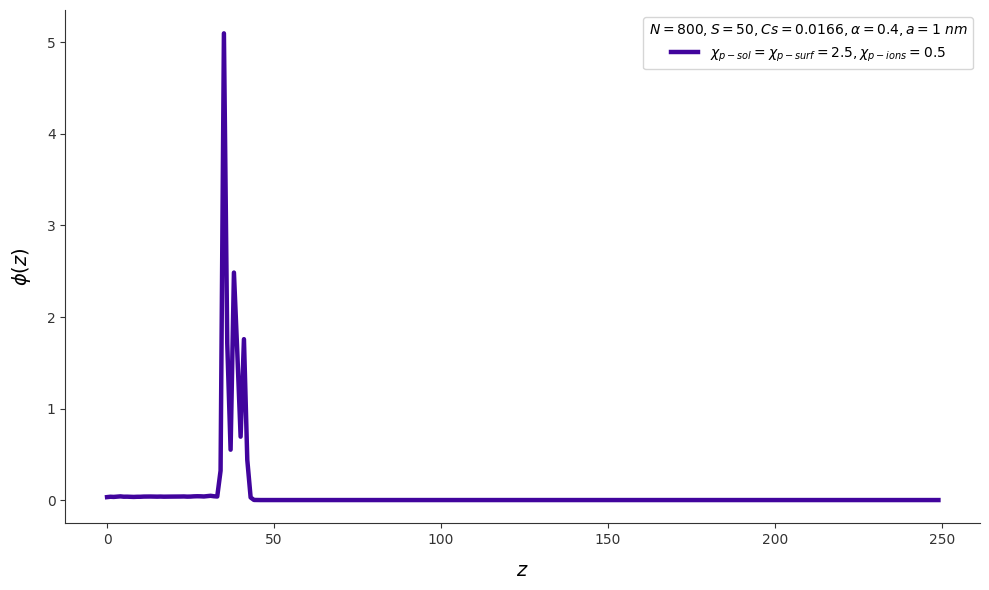

In [130]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

color_map = get_cmap("plasma")
fig, ax = plt.subplots(figsize=(10, 6))  # Создаем один график

for i, (chi, phi_brush) in enumerate(phi_brush_prof.items()):
    base_color = color_map((i+plus_i) / len(chi_range))  # Определяем цвет
    ax.plot(phi_brush, label=f'$\\chi_{{p-sol}} = \\chi_{{p-surf}} ={round(chi, 2)},  \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, color=base_color, linestyle="-")

# Настройка визуализации
ax.set_xlabel("$z$", fontsize=14, labelpad=10)
ax.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10)
ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
          title_fontsize=10, loc="upper right")

# Добавляем фон и рамку
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()

# График для электростатического потенциала

/tmp/ipykernel_2811776/1263734221.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


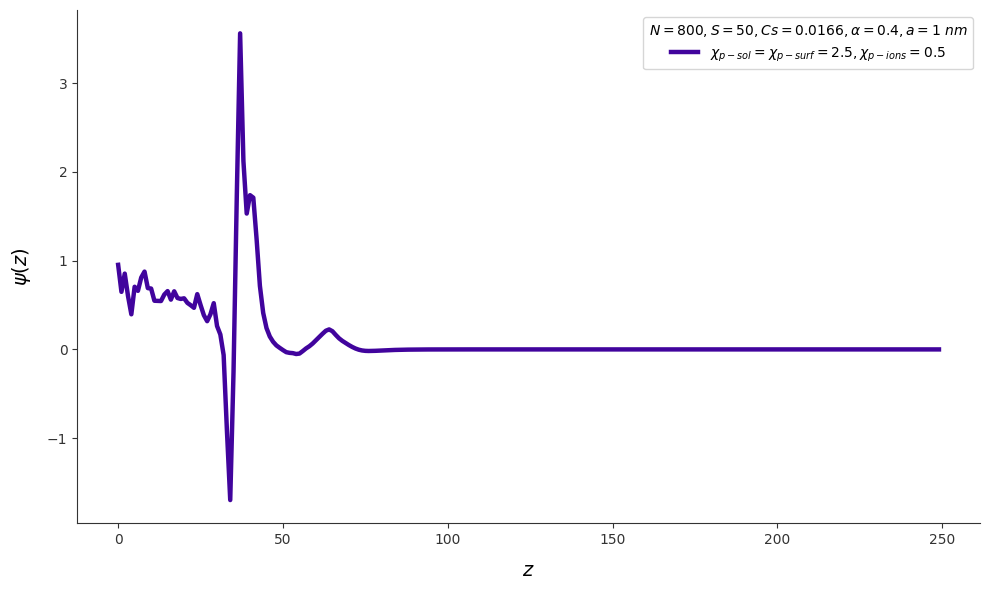

In [131]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

color_map = get_cmap("plasma")
fig, ax = plt.subplots(figsize=(10, 6))  # Создаем один график

for i, (chi, psi) in enumerate(psi_brush_prof.items()):
    base_color = color_map((i+plus_i) / len(chi_range))  # Определяем цвет
    ax.plot(psi, label=f'$\\chi_{{p-sol}} = \\chi_{{p-surf}} ={round(chi, 2)},  \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, color=base_color, linestyle="-")

# Настройка визуализации
ax.set_xlabel("$z$", fontsize=14, labelpad=10)
ax.set_ylabel("$\\psi(z)$", fontsize=14, labelpad=10)
ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
          title_fontsize=10, loc="upper right")

# Добавляем фон и рамку
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()

# График для распределения концов

/tmp/ipykernel_2811776/3360247802.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


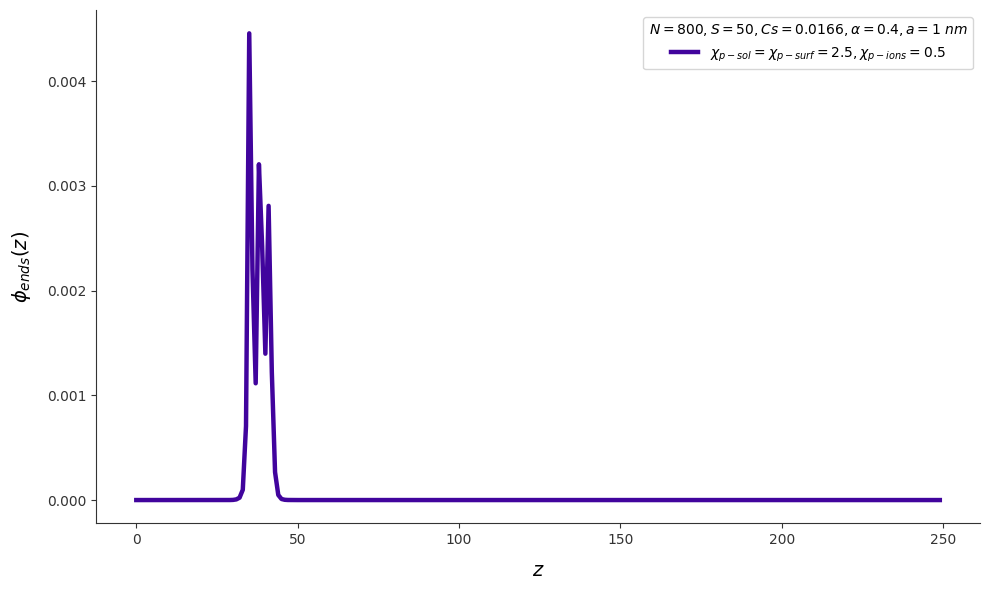

In [132]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

color_map = get_cmap("plasma")
fig, ax = plt.subplots(figsize=(10, 6))  # Создаем один график

for i, (chi, phi_end_brush) in enumerate(ends_brush_prof.items()):
    base_color = color_map((i+plus_i) / len(chi_range))  # Определяем цвет
    ax.plot(phi_end_brush, label=f'$\\chi_{{p-sol}} = \\chi_{{p-surf}} ={round(chi, 2)},  \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, color=base_color, linestyle="-")

# Настройка визуализации
ax.set_xlabel("$z$", fontsize=14, labelpad=10)
ax.set_ylabel("$\\phi_{ends}(z)$", fontsize=14, labelpad=10)
ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
          title_fontsize=10, loc="upper right")

# Добавляем фон и рамку
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()

# График для распределения Na

/tmp/ipykernel_2811776/430303232.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


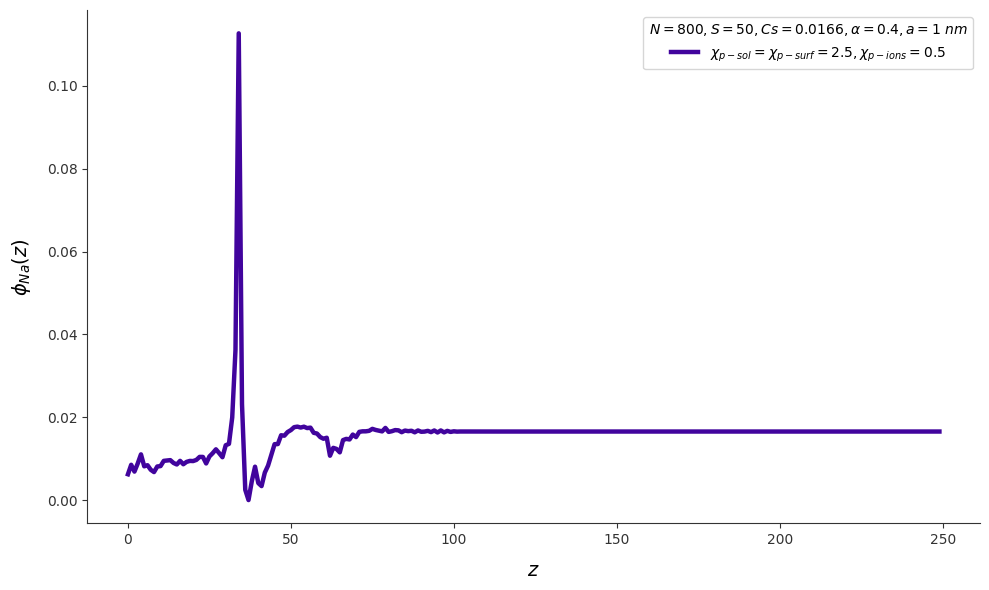

In [133]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

color_map = get_cmap("plasma")
fig, ax = plt.subplots(figsize=(10, 6))  # Создаем один график

for i, (chi, phi_Na) in enumerate(Na_prof.items()):
    base_color = color_map((i + plus_i) / len(chi_range))  # Определяем цвет
    ax.plot(phi_Na, label=f'$\\chi_{{p-sol}} = \\chi_{{p-surf}} ={round(chi, 2)},  \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, color=base_color, linestyle="-")

# Настройка визуализации
ax.set_xlabel("$z$", fontsize=14, labelpad=10)
ax.set_ylabel("$\\phi_{Na}(z)$", fontsize=14, labelpad=10)
ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
          title_fontsize=10, loc="upper right")

# Добавляем фон и рамку
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()

# График для распределения Cl

/tmp/ipykernel_2811776/4231414750.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


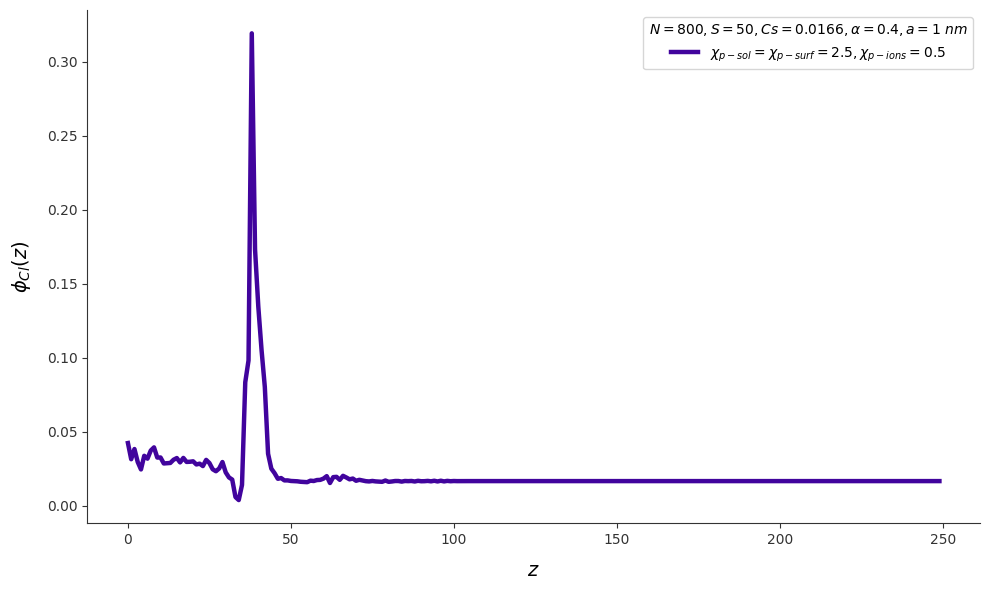

In [134]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

color_map = get_cmap("plasma")
fig, ax = plt.subplots(figsize=(10, 6))  # Создаем один график

for i, (chi, phi_Cl) in enumerate(Cl_prof.items()):
    base_color = color_map((i+plus_i) / len(chi_range))  # Определяем цвет
    ax.plot(phi_Cl, label=f'$\\chi_{{p-sol}} = \\chi_{{p-surf}} ={round(chi, 2)},  \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, color=base_color, linestyle="-")

# Настройка визуализации
ax.set_xlabel("$z$", fontsize=14, labelpad=10)
ax.set_ylabel("$\\phi_{Cl}(z)$", fontsize=14, labelpad=10)
ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
          title_fontsize=10, loc="upper right")

# Добавляем фон и рамку
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()